In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day_name()
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,year,month,day
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,2019,3,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,2019,3,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,2019,1,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,2019,2,Friday


## Question 1 : What is distribution of customer types , gender , city and branch

<AxesSubplot:xlabel='Customer type', ylabel='count'>

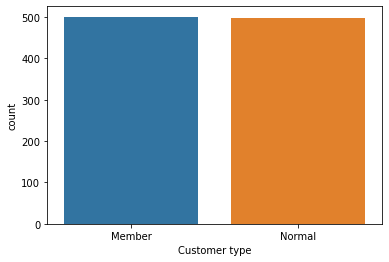

In [5]:
sns.countplot(x = 'Customer type', data = df)

<AxesSubplot:xlabel='Gender', ylabel='count'>

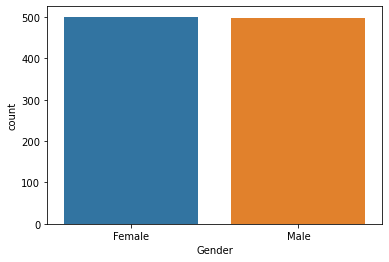

In [6]:
sns.countplot(x = 'Gender', data = df)

<AxesSubplot:xlabel='City', ylabel='count'>

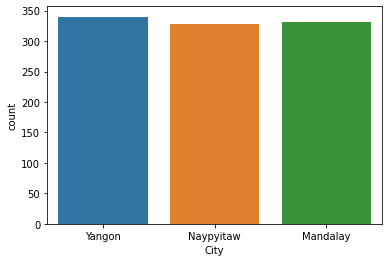

In [7]:
sns.countplot(x = 'City', data = df)

<AxesSubplot:xlabel='Branch', ylabel='count'>

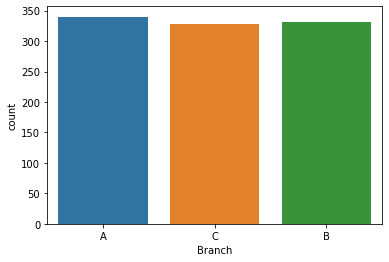

In [8]:
sns.countplot(x = 'Branch', data = df)

## Question 2 : Gross income of each city

Text(0.5, 1.0, ' gross income in m by city')

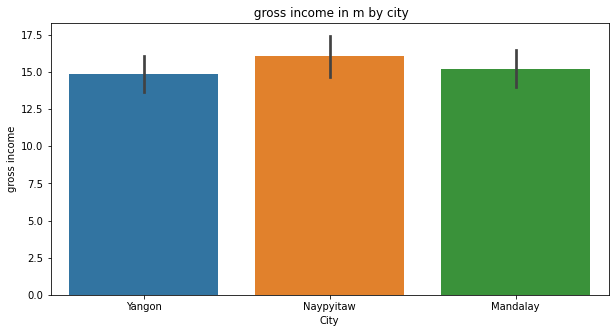

In [9]:
plt.figure(figsize= (10, 5))
sns.barplot(x= 'City', y= 'gross income',data = df)
plt.title(" gross income in m by city")

## Question 3: Quantity sold for each line

<AxesSubplot:ylabel='Product line'>

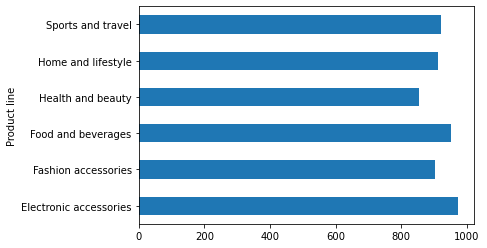

In [14]:
df2=df[['Product line','Quantity']].groupby('Product line').sum()
df2['Quantity'].plot(kind="barh")

## Question 4: Payment type for each branch

<AxesSubplot:ylabel='Payment'>

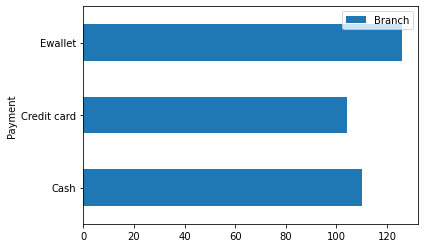

In [32]:
df3=df[['Branch','Payment']]
df4=df3[df3['Branch']=='A']
df5=df4.groupby('Payment').count()
df5.plot(kind="barh")

<AxesSubplot:ylabel='Payment'>

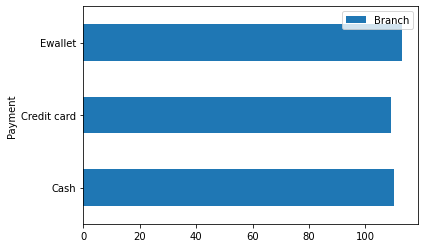

In [33]:
df3=df[['Branch','Payment']]
df4=df3[df3['Branch']=='B']
df5=df4.groupby('Payment').count()
df5.plot(kind="barh")

<AxesSubplot:ylabel='Payment'>

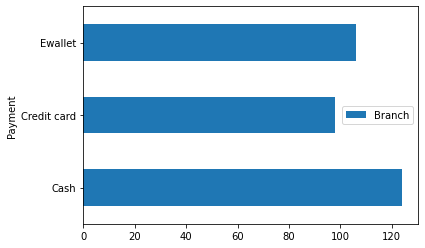

In [34]:
df3=df[['Branch','Payment']]
df4=df3[df3['Branch']=='C']
df5=df4.groupby('Payment').count()
df5.plot(kind="barh")

## Question 5: Payment for each branch in a specefic month

<BarContainer object of 3 artists>

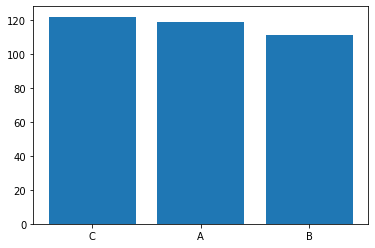

In [44]:
df2=df[df['month']==1]
df3=df2['Branch']
p=df3.value_counts()
plt.bar(p.index,p)